# Scraping smartphone details from GSMArena using Python. 

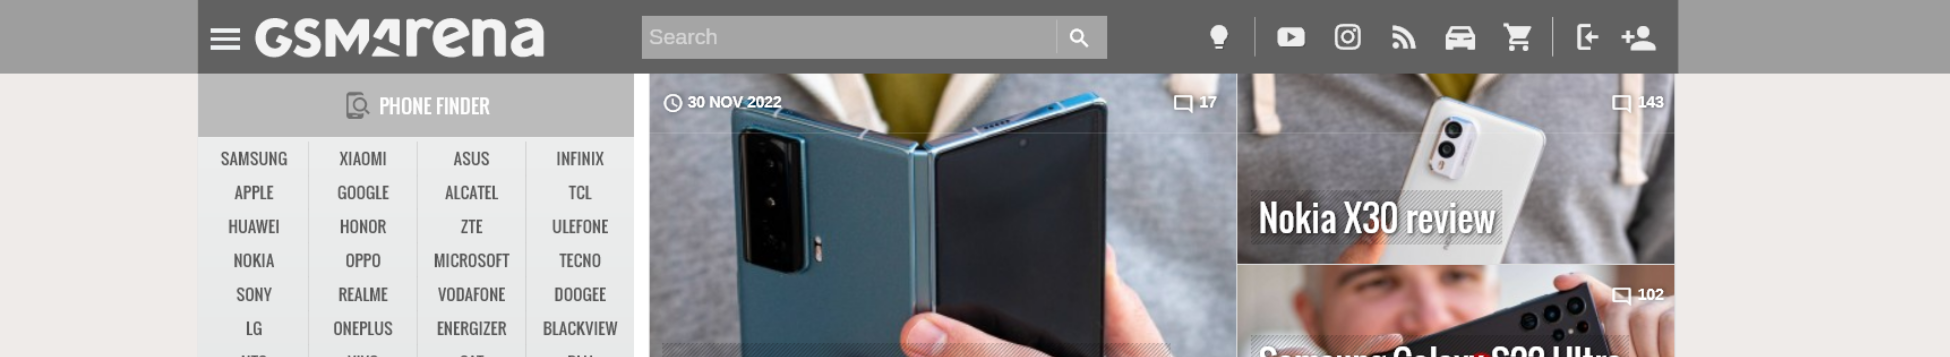

[GSMArena](https://www.gsmarena.com/) is a popular website which documents data related to specifications of every mobile device launched. In this project we will scape the website and find useful information regarding various mobile devices/tablets/smart-watches. 

We will be scraping multiple URLs and eventually we will have 110 .CSV files corresponding to various brands (such as: Asus, Nokia, Samsung,etc) and each file will contain three columns namely: Model, Release Date and Features.

These three columns will tell about the particular model name. when it was released and some basic features such as screen size, battery, camera resolution, etc. 

Legal Disclaimer from the website can be found [here](https://www.gsmarena.com/terms.php3). Lets get started with the project. 

Outline of the project:

- Introduction of Web-Scraping
- Installing and Importing required libraries
- Creating the first .csv file
- Using the first .CSV file to scrape more web-pages 
- Compiling all the data into a DataFrame using Pandas and saving the data into CSV file.

# Introduction to Web-Scraping

[Web scraping](https://www.geeksforgeeks.org/what-is-web-scraping-and-how-to-use-it/) is an automatic method to obtain large amounts of data from websites. Most of this data is unstructured data in an HTML format which is then converted into structured data in a spreadsheet or a database so that it can be used in various applications.

Web Scrapers can extract all the data on particular sites or the specific data that a user wants. Web Scraping is an important technique as it helps to collect data from various sources. Data once collected can be further used to create visualizations or make decision. 

Web Scraping is technically not any kind of illegal process but the decision is based on further various factors such as How do you use the extracted data? I have gone through the legal disclaimer of the website and as mentioned on the website, the data can be used personal and non-commercial purposes, GSMArea is not responsible for the accuracy of the data.   

# Introduction to Various Tools used for web-scraping. 

1. Python Requests Module:
The requests module allows you to send HTTP requests using Python. The HTTP request returns a Response Object with all the response data (content, encoding, status, etc).

2. Beautiful Soup Module:
Beautiful Soup is a Python library for pulling data out of HTML and XML files.

3. Pandas library:
Pandas is a python library used to create and manipulate data frames. In this project we would be mainly using it to create .CSV files. 

4. Regular Expression Python Library. 
This module provides regular expression matching operations, which we will be using to separate , clean and organize our data. 

# Scraping GSMArena to create the first .CSV file. 

The first page we will be scraping is [this.](https://www.gsmarena.com/makers.php3) Herein, we will create a .CSV file which will contain these three columums: 

- Brand Name
- Number of Devices
- Brand URL
Brand URL is the URL of that particular brand on the GSMAreana website. 

Lets us start the project by installing the required libraries. i.e requests and gather the data of this webpage.

In [1]:
import re #This is a python library which is later on needed in this particular case.

!pip install requests --upgrade --quiet
!pip install beautifulsoup4 --upgrade --quiet

import requests
from bs4 import BeautifulSoup


Next we will creating a function for downloading the web-page using requests and  another function for parsing it using Beautiful Soup.

In [2]:
def page_downloader(topics_url):
    response = requests.get(topics_url)
    if response.status_code==200:
        page_contents=response.text #saved the page in the variable. 
        
    else:
        print("Cannot download Web-Page :( ")
        return None
        
    return(page_contents)

Using Beautiful Soup To Extract Information.Let's take a look at the a tags we would be using in order to scrape the webpage. These a tags can be view by clicking the 'inspect element' option in your web-browser. 

<img src="https://miro.medium.com/max/828/1*F6au28-I6e048bC-0Xx9cQ.webp"/>

In [3]:

def page_parser(page_contents):
    doc = BeautifulSoup(page_contents, 'html.parser')
    a_tags = doc.find_all('a')
    print("HTML Page Parsed with length of {} characters, Sample A tag below:".format(len(a_tags)))
    
    return(a_tags)

Next we need to create a function that will extract all the useful information from the parsed webpage. The variable "page_contents" contains the HTML code of the webpage. The same thing in detail is mentioned in this [article.](https://medium.com/@sarthak_1997/tricky-part-of-web-scraping-explained-e03277c901a9)

In [4]:
def scrape_atags(a_tags):
    
    Company_Name = []
    No_Of_Devices = []
    url = []
    final_list = ()
    
    base_url = "https://www.gsmarena.com/"
    to_ignore = []

    for i in range(20,139):
    
        sample_tag = a_tags[i]
        final_tag = sample_tag.text.split()[0]
        match = re.match(r"([a-zA-Z]+)([0-9]+)",final_tag, re.I)
        
        if match:
            items = match.groups()
            Company_Name.append(items[0])
            No_Of_Devices.append(items[1])
            url.append( base_url + (a_tags[i].get('href')) )
            #print("+1")
    
        # FOR KNOWING LATER ON WHAT INDEXES COULD NOT BE SCRAPPED DUE TO LIMITATION OF REGEX.
        else:
            to_ignore.append(i)
            
    final_list = [Company_Name, No_Of_Devices, url]
    print("The lists have been populated.")
            
    return(final_list)



We have created three different functions lets call them to proceed. 

In [5]:
topics_url = 'https://www.gsmarena.com/makers.php3'
page_contents = page_downloader(topics_url)

In [6]:
a_tags = page_parser(page_contents)

HTML Page Parsed with length of 203 characters, Sample A tag below:


In [7]:
final_list = scrape_atags(a_tags)

The lists have been populated.


Now we have the data ready, in 'final_list' list. We need to create a Pandas Data frame for the same, once we create the data frame we can convert that into .CSV easily.


In [8]:
import pandas as pd

# Creatinng Data frame from lists.

final_df = pd.DataFrame(list(zip(final_list[0], final_list[1], final_list[2])),
               columns =['Company Name', 'Number Of Devices', 'URL'])

# Saving this dataframe as .CSV file with the name 'Dataset' 

final_df.to_csv('Dataset', index=None)

The final result of this .CSV will look like this:
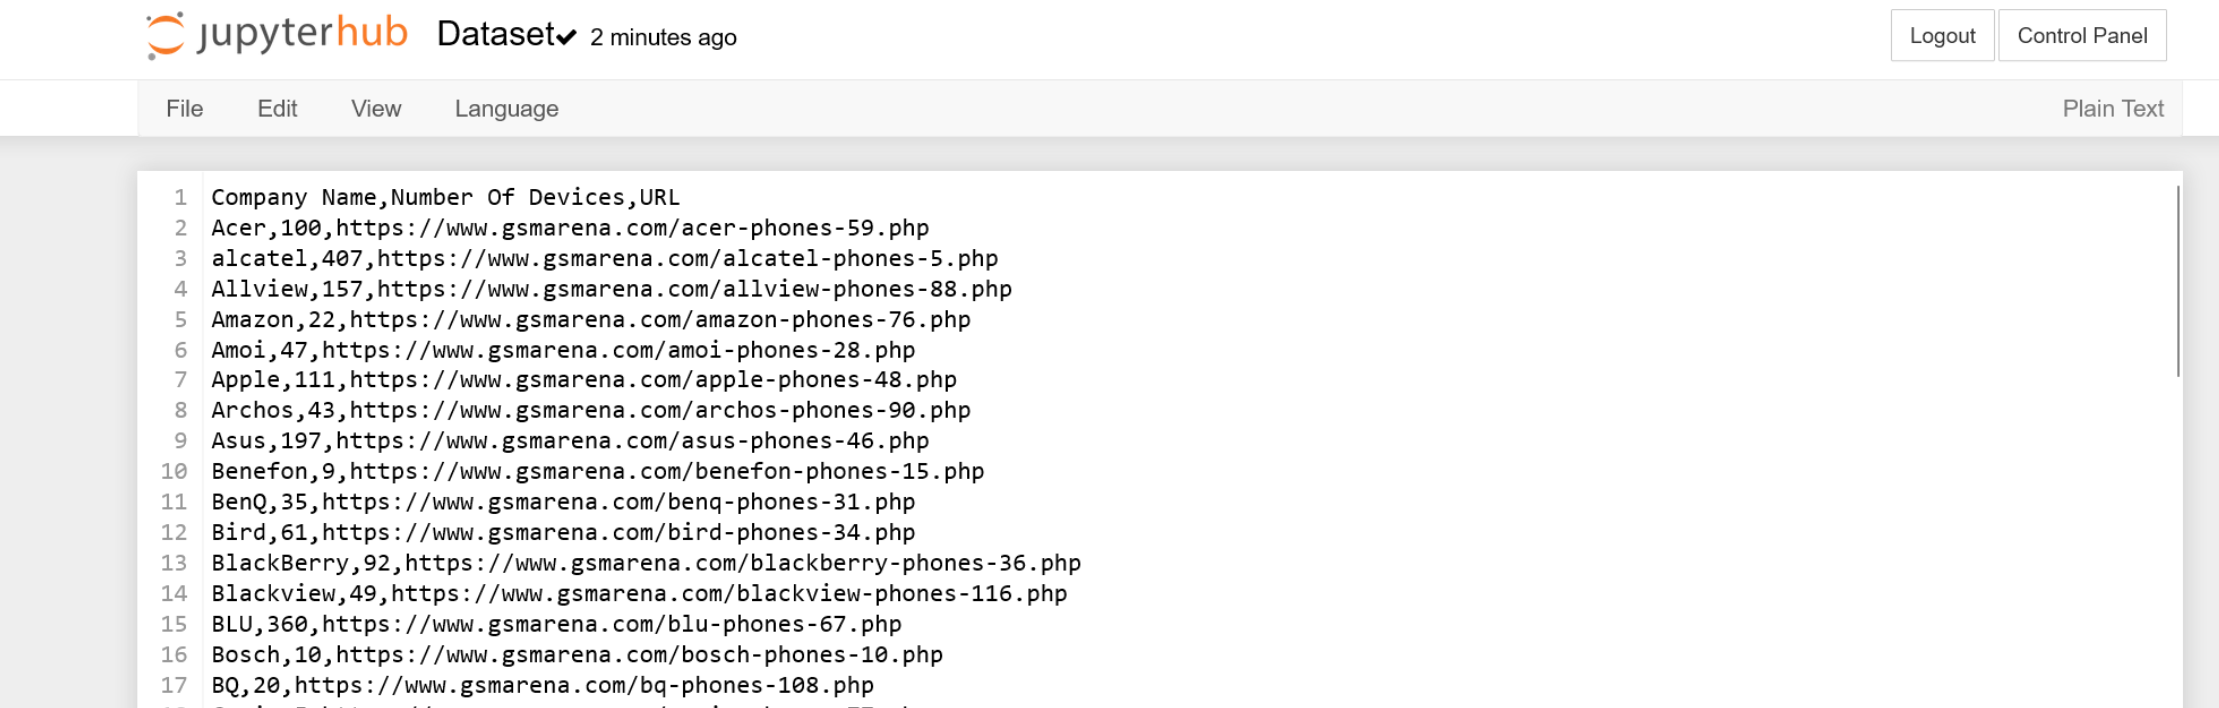

# Using this CSV to scrape the various brand pages

We have created a .CSV file, now we will be using the 'URL' column from this CSV file to scrape our next page. For this I have combined the entire code in one function. Let us know the steps involved in this function. 

Kindly note that this function is and its steps are specific to this website only, we may need to make changes based on a different scenario. 

scrape() function explained in Steps:

1. The function has a 'for' loop which chooses a URL from the previously created dataset and 'page_downloader' function. 

2. Then we have created two helper functions i.e 'parse_div_tags' and 'parse_img_tags'. These two function parse the downloaded web-page into beautiful soup object. One of them parses 'div' tags and other one parses 'img' tags.

3. Then we use the 'attrs' method to extract our useful information from the tag. This information is appended in a list which was previously created in the function. 

4. Finally we got a list which can be converted into three columns using pandas and can be written into a .CSV file.  

In [9]:
# helper functions
def parse_div_tags(page_contents):
    
    doc = BeautifulSoup(page_contents, 'html.parser')
    brand_models = doc.find_all('div', {'class': 'makers'})
    a_tag_model = str(brand_models)
    
    return(a_tag_model)


def parse_img_tags(tag):
    
    doc = BeautifulSoup(tag, 'html.parser')
    img = doc.find_all('img')
    
    return(img)
    
    
    

In [10]:
# Final Code combined. 

def scrape():
    
    for index, row in final_df.iterrows():
        
        df = [] #used to collect data
        
        page_contents_brand = page_downloader(row['URL'])
        a_tag_model = parse_div_tags(page_contents_brand)
        img_tag = parse_img_tags(a_tag_model)
            
        for img in img_tag:
            
            df.append(img.attrs['title'].split('.',2))
            model_df = pd.DataFrame(df, columns=['Model Name', 'Released Date', 'Features'])
            model_df.to_csv(row['Company Name'], index=None)
        print("Sucessfully Scrapped: " + row['Company Name'])
            
    print("Sucessfully scrapped all websites")

Now, we can call the scrape function and it will scrape the webpages for us. Every URL corresponds to a brand, and a .CSV file is created for that specific brand. 

In [11]:
# Calling the scrape function. 
scrape()

Sucessfully Scrapped: Acer
Sucessfully Scrapped: alcatel
Sucessfully Scrapped: Allview
Sucessfully Scrapped: Amazon
Sucessfully Scrapped: Amoi
Sucessfully Scrapped: Apple
Sucessfully Scrapped: Archos
Sucessfully Scrapped: Asus
Sucessfully Scrapped: Benefon
Sucessfully Scrapped: BenQ
Sucessfully Scrapped: Bird
Sucessfully Scrapped: BlackBerry
Sucessfully Scrapped: Blackview
Sucessfully Scrapped: BLU
Sucessfully Scrapped: Bosch
Sucessfully Scrapped: BQ
Sucessfully Scrapped: Casio
Sucessfully Scrapped: Cat
Sucessfully Scrapped: Celkon
Sucessfully Scrapped: Chea
Sucessfully Scrapped: Coolpad
Sucessfully Scrapped: Dell
Sucessfully Scrapped: Doogee
Sucessfully Scrapped: Emporia
Sucessfully Scrapped: Energizer
Sucessfully Scrapped: Ericsson
Sucessfully Scrapped: Eten
Sucessfully Scrapped: Fairphone
Sucessfully Scrapped: Gigabyte
Sucessfully Scrapped: Gionee
Sucessfully Scrapped: Google
Sucessfully Scrapped: Haier
Sucessfully Scrapped: Honor
Sucessfully Scrapped: HP
Sucessfully Scrapped: HTC
S

Let's take a look at one of the files which just got created. We will be again using pandas to read this .CSV file. 

In [12]:
sample = pd.read_csv("HTC")
sample.head(10)

,Model Name,Released Date,Features
0,HTC Wildfire E plus Android smartphone,Announced Oct 2022,"Features 6.52″ display, MT6739 chipset, 5150..."
1,HTC Desire 22 Pro Android smartphone,Announced Jun 2022,"Features 6.6″ display, Snapdragon 695 5G chi..."
2,HTC Wildfire E2 Plus Android smartphone,Announced Dec 2021,"Features 6.82″ display, Unisoc T610 chipset,..."
3,HTC Wildfire E3 Android smartphone,Announced Mar 2021,"Features 6.52″ display, MT6762 Helio P22 chi..."
4,HTC Desire 21 Pro 5G Android smartphone,Announced Jan 2021,"Features 6.7″ display, Snapdragon 690 5G chi..."
5,HTC Desire 20+ Android smartphone,Announced Oct 2020,"Features 6.5″ display, Snapdragon 720G chips..."
6,HTC Wildfire E1 lite Android smartphone,Announced Sep 2020,"Features 5.45″ display, MT6761D Helio A20 ch..."
7,HTC Wildfire E2 Android smartphone,Announced Aug 2020,"Features 6.22″ display, MT6762D Helio P22 ch..."
8,HTC Wildfire E1 plus Android smartphone,Announced Dec 2019,"Features 6.09″ display, MT6763 Helio P23 chi..."
9,HTC Wildfire E1 Android smartphone,Announced Dec 2019,"Features 6.09″ display, MT6763 Helio P23 chi..."


# References and Future Work.

1. Summary:

Herein, we scrapped almost 100 web-pages and extracted information from them. This information can be useful for someone analysing changes in various specs patterns of the device manufacturer over the year. We used python, requests and beautiful soup module to complete he entire project. I have also written a blog post regarding the same, do check it out [here.](https://medium.com/@sarthak_1997/tricky-part-of-web-scraping-explained-e03277c901a9)

2. References/Useful Links:

- https://www.w3schools.com
- https://stackoverflow.com/
-https://www.geeksforgeeks.org/

3. Ideas for Future Work:

If we go one step ahead and start extracting benchmark scores such as Geekbench or AnTuTu for every device which is mentioned on the product page, we can gather a bunch of data to analyse what combination of specification (such as Processor,RAM or GPU) is most likely to give an expected benchmark score.
We could withdraw some major conclusions regarding hardware and software performance from the same.